# Model Accuracy I

This notebook discusses how to evaluate the accuracy of the coefficient estimates. We will


- Discuss how the least square line estimates the population regression line

- How to evaluate the accuracy of the coeffients in a least square line



### __Pupulation Line VS Least Square Line__

__Review from the previous class:__

we have a data set $\{(X_i, y_i)\ :\ i = 1, ..., p\}$. We assume the true relationship between $X_i$ and $y_i$ is

$$ y = f(X) + \epsilon $$

where $\epsilon$ is a mean-zero error term (typically assume that the error term is independent of X). If $f$ is assumed to be linear, the model is:

$$ Y = \beta_0 + \beta_1X + \epsilon. $$

Here, $\beta_0$ is the intercept (expected $y$ when $X = 0$) and $\beta_1$  is the slope (average change in $y$ for a one-unit change in $X$). The error term accounts for deviations from this simple model, including non-linearity, omitted variables, and measurement errors. We assume the error term is independent of $X$.

This model defines __the population regression line__, which is the best linear approximation to the true relationship between X and Y. The least squares approach chooses $ \hat{\beta}_0 $ and $ \hat{\beta}_1 $ to minimize the __the residual sum of squares (RSS)__:

$$ \text{RSS} = (y_1 - \hat{\beta}_0 - \hat{\beta}_1 x_1)^2 + (y_2 - \hat{\beta}_0 - \hat{\beta}_1 x_2)^2 + \cdots + (y_n - \hat{\beta}_0 - \hat{\beta}_1 x_n)^2 $$

we saw that the minimizers are:

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$


At first, the difference between the population regression line and the least squares line might seem confusing, especially with just one data set. This is similar to using sample data to estimate population parameters. For example, the sample mean $\bar{y}$ estimates the population mean $\mu$; while $\bar{y}$ may not exactly equal $\mu$, it generally provides a good estimate.


In linear regression, the least squares line approximates the true population regression line. The coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ are estimated from the data, while the true coefficients are $\beta_0$ and $\beta_1$. Although $\hat{\beta}_0$ and $\hat{\beta}_1$ may not exactly match $\beta_0$ and $\beta_1$, averaging over many data sets will make these estimates very close to the true values.


In [3]:
## Needed Libraries

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns


## LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import statsmodels.api as sm

## This sets the plot style
## to have a grid on a white background (for readability of visualizations)
sns.set_style("whitegrid")

In [4]:
# This generates data that look line a line
x = np.linspace(-5, 5, 75) ## Domain of the line
y = 2 * x + 3 + 2 * np.random.randn(75)  ## Linear relationship with added random noise

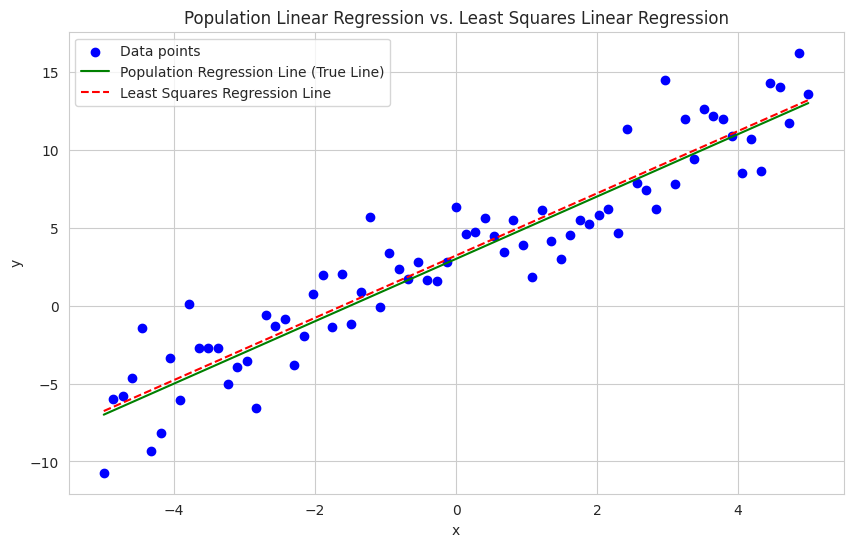

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data
x = np.linspace(-5, 5, 75)
y = 2 * x + 3 + 2 * np.random.randn(75)

# Calculate the least squares linear regression line
# We need to fit the data to the model y = mx + b

# Compute the coefficients
A = np.vstack([x, np.ones(len(x))]).T
m, b = np.linalg.lstsq(A, y, rcond=None)[0]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')

# Plot the population regression line (the true line used to generate data)
x_line = np.linspace(-5, 5, 100)
y_line = 2 * x_line + 3
plt.plot(x_line, y_line, color='green', label='Population Regression Line (True Line)')

# Plot the least squares regression line
y_fit = m * x_line + b
plt.plot(x_line, y_fit, color='red', linestyle='--', label='Least Squares Regression Line')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Population Linear Regression vs. Least Squares Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### __How far off the least square line of the true relationship is?__

What if we dont have access to many datasets? A single data set might lead to a substantial underestimate or overestimate of the true relationship.
In general, we answer this question by computing __the standard error of that single estimate__. In this section we go over

1- the standard error of an estimate in general case

2-  the standard error of a regression line.

3-  how to use standard errors to create a 95% confidence interval for a regression coefficient.

4- how to use Standard errors to perform hypothesis testing on the coefficients


#### __1- Review of the standard error__



Suppose we estimate the population mean $ \mu $ of a random variable $ Y $. The accuracy of the sample mean $ \hat{\mu} $ as an estimate of $ \mu $ is measured by its standard error $ \text{SE}(\hat{\mu}) $, given by:

$$ \text{SE}(\hat{\mu}) = \frac{\sigma}{\sqrt{n}} $$


where $ \sigma $ is the standard deviation of $ Y $.


__Discussion__  

1- Take a moment and check why this formula measures the accuracy of $\hat{\mu}$.

2- Is this statement correct:

The standard error gives the average difference between $ \hat{\mu} $ and $ \mu $, decreasing as the sample size $ n $ increases.


__Write your answer here__


####  __2- The standard errors for regression coefficients__

It's quite straight forward to check that the standard errors for regression coefficients $ \hat{\beta}_0 $ and $ \hat{\beta}_1 $ are:

$$ \text{SE}(\hat{\beta}_0) = \sqrt{\frac{\sigma^2}{n} \left(1 + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2}\right)}, \quad  \text{SE}(\hat{\beta}_1) = \frac{\sigma}{\sqrt{\sum (x_i - \bar{x})^2}} $$

where $\sigma^2$ is the variance of the errors ${\epsilon}_i$, which are assumed to have common variance and be uncorrelated (why we can assume that?).


__Exercise 1:__ write fuctions that computes the above formulas.

In [8]:
## You code

In [9]:
## You Code

#### __3- how to use standard errors to create a 95% confidence interval for a regression coefficient.__



A 95% confidence interval for $ \beta_1 $ provides a range within which the true value of $ \beta_1 $ is likely to lie with a 95% probability. The endpoints of the confidence interval are given by:


$$ \hat{\beta}_1 \pm 2 \cdot \text{SE}(\hat{\beta}_1) $$




##### __Discussion:__ Why this is the case?

__Write your answer here__

In the calculation of $SE(\hat{\beta_1})$, typically, $ \sigma^2 $ is unknown and estimated from the data by what is knowon as _the residual standard error:_ or RSE. RSE is essentially the standard deviation of the residuals. It gives an idea of the average amount by which the predicted values differ from the actual values. In other words, it measures the total variation in the data that is not explained by the model. Here is the formula for RSE:

$$
RSE = \sqrt{\frac{RSS}{n - 2}}
$$

Where $n$ is the number of observations, and RSS, _Residual Sum of Squares_, is given by

$$ RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$.


__Note:__
- Dividing by $n - 2$ instead of $n$ is necessary because in a simple linear regression, two degrees of freedom are lost due to the estimation of the slope and intercept.

- Taking the square root provides a measure that is in the same units as the response variable \(y\), making it easier to interpret.

- When $ \sigma^2 $ is estimated, we should write $ \text{SE}(\hat{\beta}_1) $ but will drop the extra "hat" for simplicity.



__Discussion:__ How to interpet a 95% confidence interval for regression coefficients?


Suppose for the advertising data, a 95% confidence interval for $ \beta_0 $ is $[6.130, 7.935]$, and a 95% confidence interval for $ \beta_1 $ of $[0.042, 0.053]$. How do you interpret these intervals? In other words, how do you explain this numbers to your boss who is has no background in math or statistics?

__Write your answer here__

__Exercise 2__

For our simulated data, find the 95% confidence intervals for $ \beta_0 $ and $ \beta_1 $. Interpret these results.

In [ ]:
### you code:

####__4- how to use Standard errors to perform hypothesis testing on the coefficients.__

Standard errors can also be used to perform hypothesis tests on the coefficients. We test:

- **Null Hypothesis ($H_0$):** $ \beta_1 = 0 $ (No relationship between $ X $ and $ Y $)
- **Alternative Hypothesis ($H_a$):** $ \beta_1 \neq 0 $ (There is a relationship between $ X $ and $ Y $)

We determine if $ \hat{\beta}_1 $ is significantly different from zero using its standard error ($ SE(\hat{\beta}_1) $). We compute the t-statistic:

$$ t = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)} $$

If $ SE(\hat{\beta}_1) $ is small, even a small $ \hat{\beta}_1 $ may indicate a significant relationship. Conversely, a large $ SE(\hat{\beta}_1) $ means $ \hat{\beta}_1 $ must be large to reject $ H_0 $.

The t-statistic follows a t-distribution with $ n - 2 $ degrees of freedom. The p-value, the probability of observing a t-statistic as extreme as $ |t| $ under $ H_0 $, helps assess significance. A small p-value (e.g., < 0.05) suggests rejecting $ H_0 $, indicating a significant relationship.

For example, in the advertising data:

- **Coefficients:**
  - Intercept: $ \hat{\beta}_0 = 7.0325 $ (Std. Error: 0.4578)
  - TV Budget: $ \hat{\beta}_1 = 0.0475 $ (Std. Error: 0.0027)

- **t-Statistics:**
  - Intercept: 15.36
  - TV Budget: 17.67

- **p-values:** Both are < 0.0001.

These high t-statistics and low p-values indicate that both $ \beta_0 $ and $ \beta_1 $ are significantly different from zero. Thus, there is a significant relationship between the TV advertising budget and the number of units sold.

__Exercise 3__

Perform hypothesis tests on the coefficients for the dataset provided and interpret the results.